# ISLR: Chapter 3 - Linear Regression

- [Load Datasets](#Load-Datasets)
- [3.1 Simple Linear Regression](#3.1-Simple-Linear-Regression)
- [3.2 Multiple Linear Regression](#3.2-Multiple-Linear-Regression)
- [3.3 Other Considerations in the Regression Model](#3.3-Other-Considerations-in-the-Regression-Model)
- [3.5 KNN](#3.5-KNN)
- [3.6 LAB](#3.6-LAB)

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf # more convenient

# %matplotlib?
%matplotlib inline
plt.style.use('seaborn-white')

### Load Datasets
Datasets available on http://www-bcf.usc.edu/~gareth/ISL/data.html

In [4]:
import os

UP_DIR = '/Users/iordan/Documents/Statistics/Hunter/Data Science_STAT724/2020/data/'

In [5]:
csv_file = os.path.join(UP_DIR,'Advertising.csv')
advertising = pd.read_csv(csv_file, usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
csv_file = os.path.join(UP_DIR,'Credit.csv')
credit = pd.read_csv(csv_file, usecols=list(range(1,12)))
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0


In [7]:
csv_file = os.path.join(UP_DIR,'Auto.csv')
auto = pd.read_csv(csv_file, na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [8]:
auto.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320


## 3.1 Simple Linear Regression

### Figure 3.1 - Least squares fit

In [8]:
%matplotlib inline

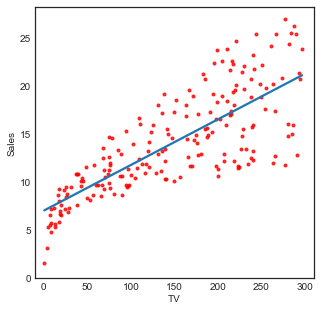

In [9]:
#plt.ioff()
plt.figure(figsize=(5,5))
sns.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(ymin=0)
plt.show()

### Figure 3.2 - Regression coefficients - RSS
Note that the text in the book describes the coefficients based on uncentered data, whereas the plot shows the model based on centered data. The latter is visually more appealing for explaining the concept of a minimum RSS. In order not to confuse the reader, the values on the axis of the B0 ($\beta_0$) coefficients have been changed to correspond with the text. The axes on the plots below are unaltered.

#### Scikit-Learn

In [9]:
# Regression coefficients (Ordinary Least Squares) - Sciki-Learn
regr = skl_lm.LinearRegression()

X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
# ver2: with unscaled data
# X = np.array(advertising.TV)
# X = X.reshape(-1,1)
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

14.0225
[0.04753664]


In [10]:
regr.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss

2.1025305831313514

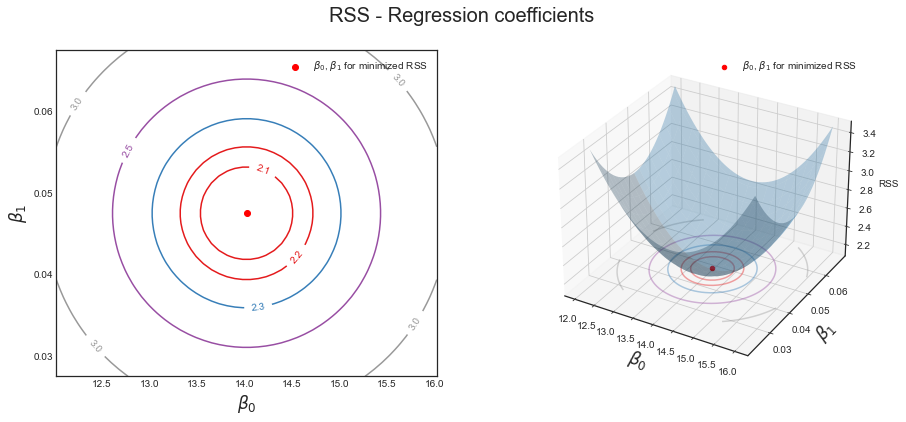

In [12]:
%matplotlib inline

fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

### Table 3.1 & 3.2 - Statsmodels 

In [13]:
### Use: statsmodels

est = smf.ols('Sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [14]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           1.47e-42
Time:                        18:45:12   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# RSS with regression coefficients
((advertising.Sales - (est.params[0] + est.params[1]*advertising.TV))**2).sum()/1000

2.1025305831313514

### Table 3.1 & 3.2 - Scikit-learn

In [15]:
regr = skl_lm.LinearRegression()

X = advertising.TV.values.reshape(-1,1)
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

7.032593549127693
[0.04753664]


In [16]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

0.611875050850071

### Accuracy of the coefficients - Figure 3.3

#### Population line plots

In [69]:
np.random.seed(10463555)

x = np.random.uniform(low=-2.0, high=2.0, size=100)
ylin = 2 + 3*x
y = 2 + 3*x + np.random.normal(scale=3.0, size=x.shape)

# https://stackoverflow.com/questions/21887754/concatenate-two-numpy-arrays-vertically
df = pd.DataFrame(data=np.column_stack((x,y)), columns=['x','y'])

m = smf.ols(formula='y ~ x',data=df)
r = m.fit()
y2 = r.fittedvalues

#### (b) Repeat with many copies of simulated data. Plot histograms of coefficient estimates

In [70]:
type(r.params.tolist())
np.array(r.params.tolist())
#np.empty((1,2))

array([1.96927279, 3.2202801 ])

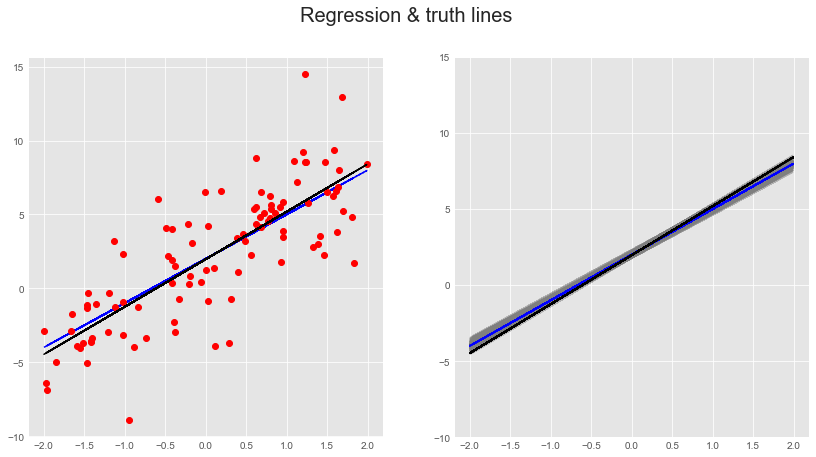

In [72]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(14,7))
fig.suptitle('Regression & truth lines', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Left plot
ax1.plot(x, ylin, 'b--')  # true linear dependence
ax1.plot(x, y, 'ro')      # generated points
ax1.plot(x, y2, 'k-')     # fitted regression line

# Right plot
runs = 200
cf = np.empty((1,2))
for i in range(runs):
        ysim = 2 + 3*x + np.random.normal(scale=1.0, size=x.shape)
        dfsim = pd.DataFrame(data=np.column_stack((x,ysim)), columns=['x','y'])
        rsim = smf.ols(formula='y ~ x',data=dfsim).fit()
        cf = np.row_stack((cf,rsim.params.tolist()))
        # add the current, generating and 1st fit lines
        ax2.plot(x, rsim.fittedvalues, color='tab:gray', lw=1, alpha=0.5) # simulated
        ax2.plot(x, ylin, 'b-') # true line
        ax2.plot(x, y2, 'k-')   # 1st regression
        ax2.set_ylim((-10,15))
        
plt.show()

In [ ]:
### Distribution of the regression coefficients

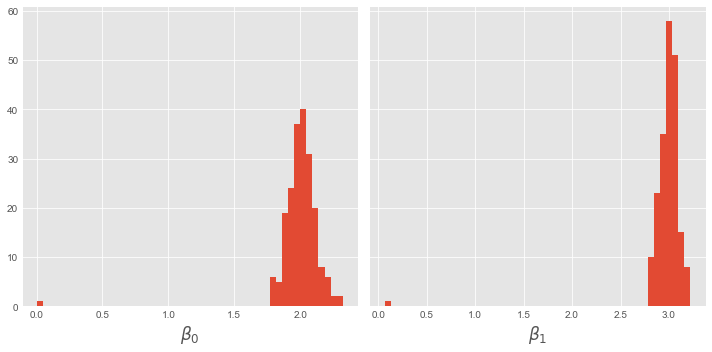

In [73]:
fig, ax = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(10,5))
n_bins = 50
# We can set the number of bins with the `bins` kwarg
ax[0].hist(cf[:,0], bins=n_bins)
ax[0].set_xlabel(r'$\beta_0$', fontsize=17)
ax[1].hist(cf[:,1], bins=n_bins)
ax[1].set_xlabel(r'$\beta_1$', fontsize=17)

plt.show()

## 3.2 Multiple Linear Regression

### Table 3.3 - Statsmodels

In [28]:
est = smf.ols('Sales ~ Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [29]:
est = smf.ols('Sales ~ Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


### Table 3.4 & 3.6 - Statsmodels

In [30]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 09 Sep 2020   Prob (F-statistic):           1.58e-96
Time:                        18:20:16   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Table 3.5 - Correlation Matrix

In [31]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### Figure 3.5 - Multiple Linear Regression

In [32]:
regr = skl_lm.LinearRegression()

X = advertising[['Radio', 'TV']].values # .to_matrix()
y = advertising.Sales

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[0.18799423 0.04575482]
2.9210999124051398


In [33]:
# What are the min/max values of Radio & TV?
# Use these values to set up the grid for plotting.
advertising[['Radio', 'TV']].describe()

,Radio,TV
count,200.000000,200.000000
mean,23.264000,147.042500
std,14.846809,85.854236
min,0.000000,0.700000
25%,9.975000,74.375000
50%,22.900000,149.750000
75%,36.525000,218.825000
max,49.600000,296.400000


In [34]:
# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

/Users/iordan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  del sys.path[0]


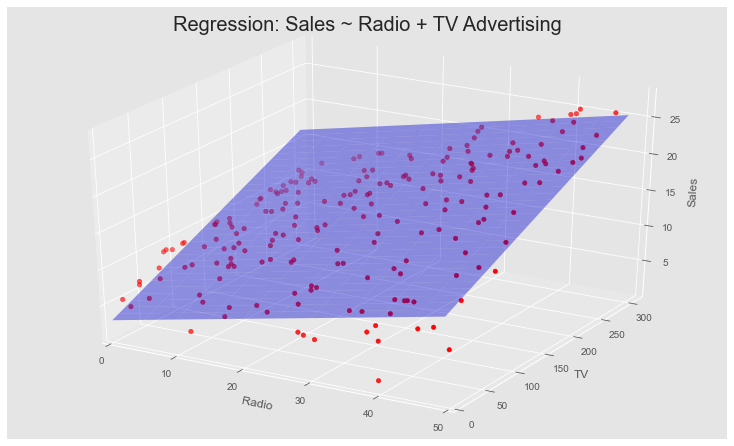

In [35]:
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4, color='b')
ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');

## 3.3 Other Considerations in the Regression Model

### Figure 3.6

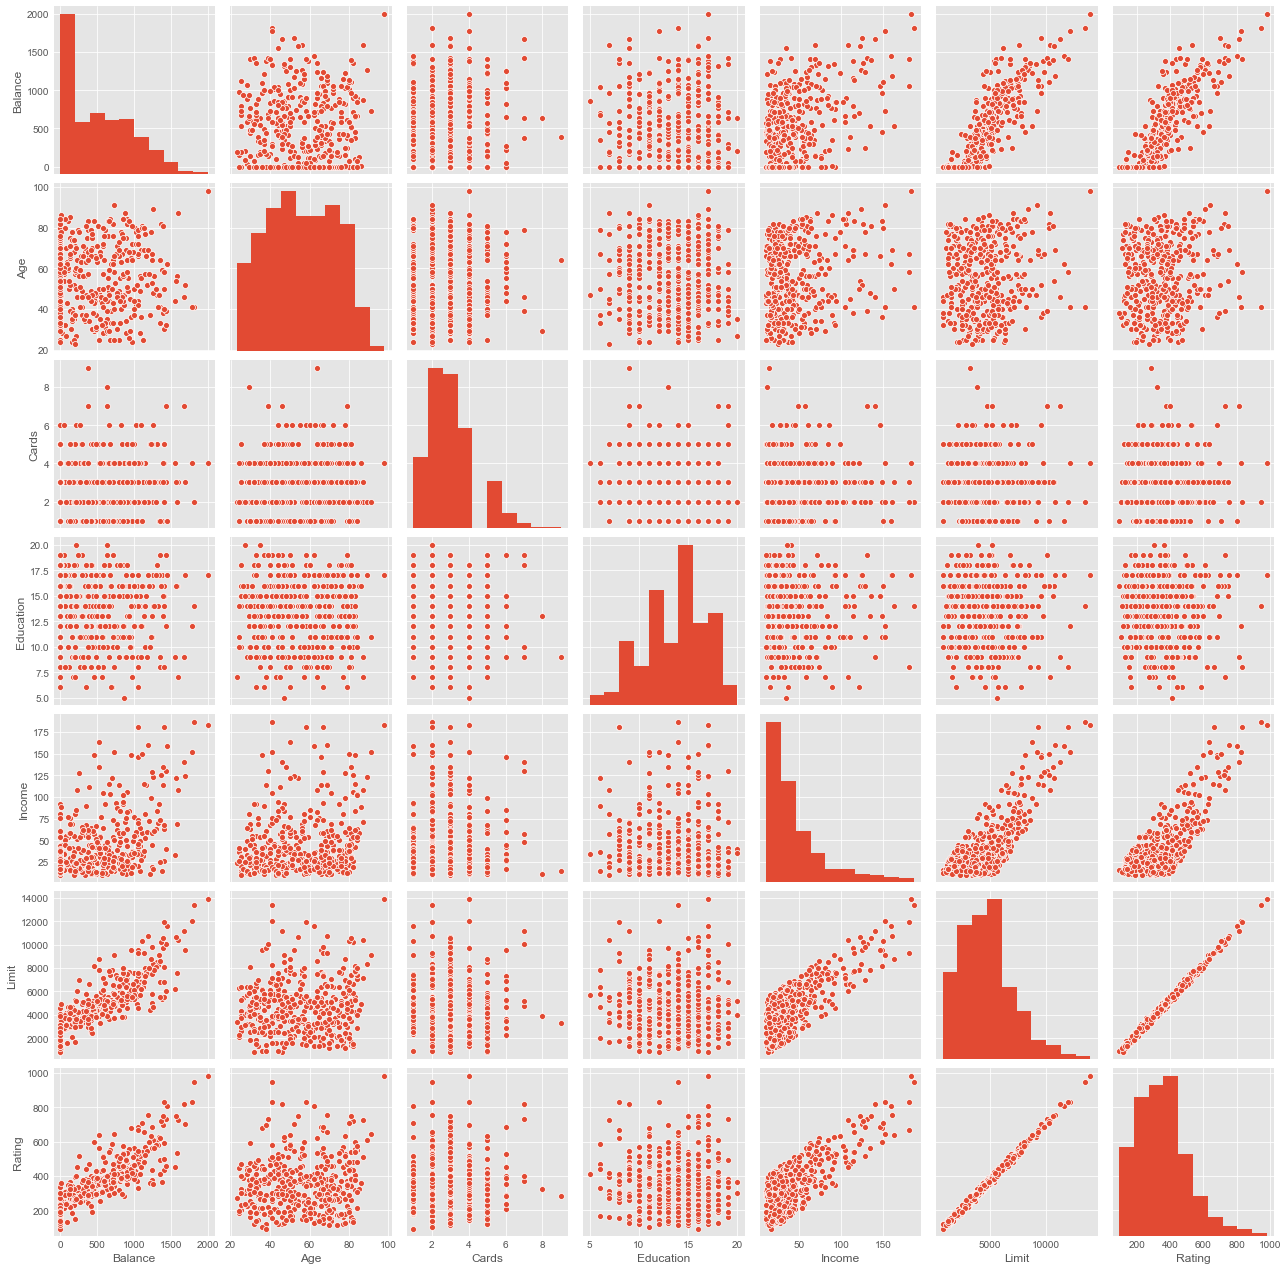

In [36]:
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']]);

### Qualitative Predictors

###  Table 3.7

In [37]:
est = smf.ols('Balance ~ Gender', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Gender[T.Female],19.7331,46.051,0.429,0.669,-70.801,110.267


### Table 3.8

In [38]:
est = smf.ols('Balance ~ Ethnicity', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


### Table 3.9 - Interaction Variables

In [40]:
est = smf.ols('Sales ~ TV + Radio + TV*Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


### Figure 3.7 - Interaction between qualitative and quantative variables

In [41]:
est1 = smf.ols('Balance ~ Income + Student2', credit).fit()
regr1 = est1.params
est2 = smf.ols('Balance ~ Income + Income*Student2', credit).fit()
regr2 = est2.params

print('Regression 1 - without interaction term')
print(regr1)
print('\nRegression 2 - with interaction term')
print(regr2)

Regression 1 - without interaction term
Intercept    211.142964
Income         5.984336
Student2     382.670539
dtype: float64

Regression 2 - with interaction term
Intercept          200.623153
Income               6.218169
Student2           476.675843
Income:Student2     -1.999151
dtype: float64


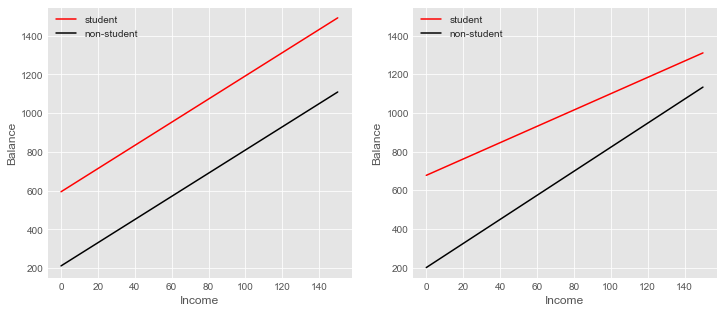

In [42]:
# Income (x-axis)
income = np.linspace(0,150)

# Balance without interaction term (y-axis)
student1 = np.linspace(regr1['Intercept']+regr1['Student2'],
                       regr1['Intercept']+regr1['Student2']+150*regr1['Income'])
non_student1 =  np.linspace(regr1['Intercept'], regr1['Intercept']+150*regr1['Income'])

# Balance with iteraction term (y-axis)
student2 = np.linspace(regr2['Intercept']+regr2['Student2'],
                       regr2['Intercept']+regr2['Student2']+
                       150*(regr2['Income']+regr2['Income:Student2']))
non_student2 =  np.linspace(regr2['Intercept'], regr2['Intercept']+150*regr2['Income'])

# Create plot
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(income, student1, 'r', income, non_student1, 'k')
ax2.plot(income, student2, 'r', income, non_student2, 'k')

for ax in fig.axes:
    ax.legend(['student', 'non-student'], loc=2)
    ax.set_xlabel('Income')
    ax.set_ylabel('Balance')
    ax.set_ylim(ymax=1550)

### Figure 3.8 - Non-linear relationships (<font color='blue'>dataset: auto</font> )

In [49]:
#sns.regplot?

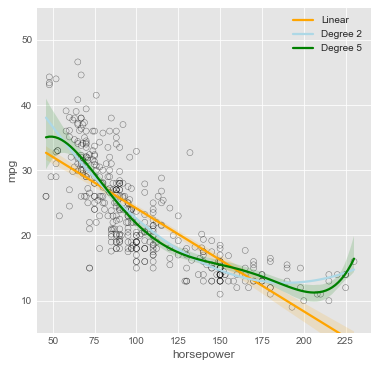

In [51]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
fig = plt.figure(figsize=(6,6)) 

plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(auto.horsepower, auto.mpg, ci=95, label='Linear', scatter=False, color='orange')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(auto.horsepower, auto.mpg, ci=95, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

### Table 3.10

In [52]:
auto['horsepower2'] = auto.horsepower**2
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0


In [53]:
est = smf.ols('mpg ~ horsepower + horsepower2', auto).fit()
est.summary().tables[1]

#R syntax: 
#'mpg ~ horsepower + I(horsepower^2)'

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
horsepower2,0.0012,0.000,10.080,0.000,0.001,0.001


### Figure 3.9

In [54]:
regr = skl_lm.LinearRegression()

# Linear fit
X = auto.horsepower.values.reshape(-1,1)
y = auto.mpg
regr.fit(X, y)

auto['pred1'] = regr.predict(X)
auto['resid1'] = auto.mpg - auto.pred1

# Quadratic fit
X2 = auto[['horsepower', 'horsepower2']] #.as_matrix()
regr.fit(X2, y)

auto['pred2'] = regr.predict(X2)
auto['resid2'] = auto.mpg - auto.pred2

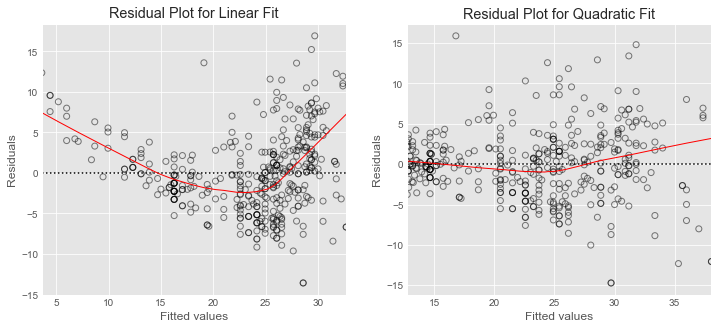

In [55]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(auto.pred1, auto.resid1, lowess=True, 
            ax=ax1, line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(auto.pred2, auto.resid2, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax=ax2,
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

### Figure 3.14 (<font color='blue'>dataset: credit</font>)

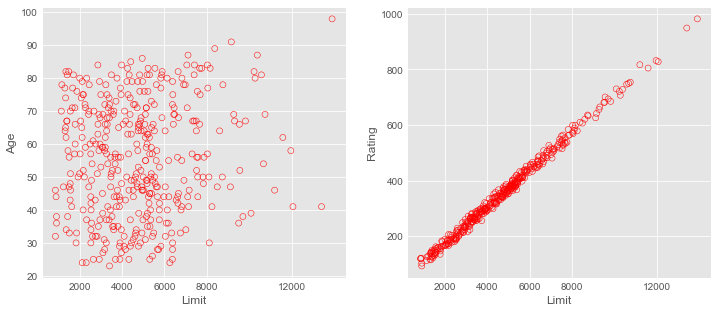

In [56]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.scatter(credit.Limit, credit.Age, facecolor='None', edgecolor='r')
ax1.set_ylabel('Age')

# Right plot
ax2.scatter(credit.Limit, credit.Rating, facecolor='None', edgecolor='r')
ax2.set_ylabel('Rating')

for ax in fig.axes:
    ax.set_xlabel('Limit')
    ax.set_xticks([2000,4000,6000,8000,12000])

### Figure 3.15

In [57]:
y = credit.Balance

# Regression for left plot - with scaling!
X = credit[['Age', 'Limit']]
regr1 = skl_lm.LinearRegression()
regr1.fit(scale(X.astype('float'), with_std=False), y)
print('Age/Limit\n',regr1.intercept_)
print(regr1.coef_)

# Regression for right plot - with scaling!
X2 = credit[['Rating', 'Limit']]
regr2 = skl_lm.LinearRegression()
regr2.fit(scale(X2.astype('float'), with_std=False), y)
print('\nRating/Limit\n',regr2.intercept_)
print(regr2.coef_)

Age/Limit
 520.0150000000001
[-2.29148553  0.17336497]

Rating/Limit
 520.015
[2.20167217 0.02451438]


In [58]:
# Create grid coordinates for plotting
B_Age = np.linspace(regr1.coef_[0]-3, regr1.coef_[0]+3, 100)
B_Limit = np.linspace(regr1.coef_[1]-0.02, regr1.coef_[1]+0.02, 100)

B_Rating = np.linspace(regr2.coef_[0]-3, regr2.coef_[0]+3, 100)
B_Limit2 = np.linspace(regr2.coef_[1]-0.2, regr2.coef_[1]+0.2, 100)

X1, Y1 = np.meshgrid(B_Limit, B_Age, indexing='xy')
X2, Y2 = np.meshgrid(B_Limit2, B_Rating, indexing='xy')
Z1 = np.zeros((B_Age.size,B_Limit.size))
Z2 = np.zeros((B_Rating.size,B_Limit2.size))

Limit_scaled = scale(credit.Limit.astype('float'), with_std=False)
Age_scaled = scale(credit.Age.astype('float'), with_std=False)
Rating_scaled = scale(credit.Rating.astype('float'), with_std=False)

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z1):
    Z1[i,j] =((y - (regr1.intercept_ + X1[i,j]*Limit_scaled +
                    Y1[i,j]*Age_scaled))**2).sum()/1000000
    
for (i,j),v in np.ndenumerate(Z2):
    Z2[i,j] =((y - (regr2.intercept_ + X2[i,j]*Limit_scaled +
                    Y2[i,j]*Rating_scaled))**2).sum()/1000000

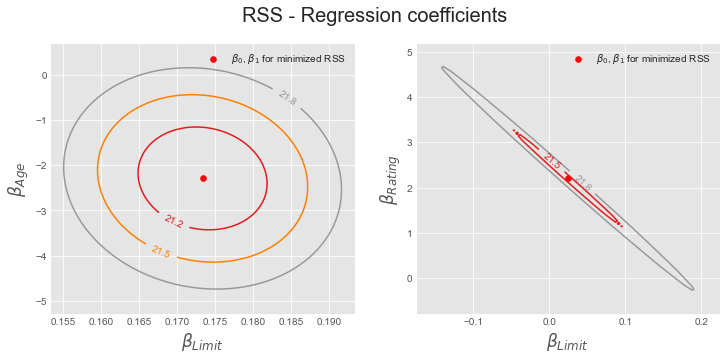

In [59]:
fig = plt.figure(figsize=(12,5))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
    
# Left plot
CS = ax1.contour(X1, Y1, Z1, cmap=plt.cm.Set1, levels=[21.25, 21.5, 21.8])
ax1.scatter(regr1.coef_[1], regr1.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax1.set_ylabel(r'$\beta_{Age}$', fontsize=17)

# Right plot
CS = ax2.contour(X2, Y2, Z2, cmap=plt.cm.Set1, levels=[21.5, 21.8])
ax2.scatter(regr2.coef_[1], regr2.coef_[0], c='r', label=min_RSS)
ax2.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax2.set_ylabel(r'$\beta_{Rating}$', fontsize=17)
ax2.set_xticks([-0.1, 0, 0.1, 0.2])

for ax in fig.axes:
    ax.set_xlabel(r'$\beta_{Limit}$', fontsize=17)
    ax.legend()

'Limit' and 'rating' are highly correlated (colinear) and this causes unstability of the OLS estimates as can be seen on the plot on right.

We can detect multicolinearity wuth the VIF measure defined next.

### Variance Inflation Factor - page 102

In [50]:
est_Age = smf.ols('Age ~ Rating + Limit', credit).fit()
est_Rating = smf.ols('Rating ~ Age + Limit', credit).fit()
est_Limit = smf.ols('Limit ~ Age + Rating', credit).fit()

print(1/(1-est_Age.rsquared))
print(1/(1-est_Rating.rsquared))
print(1/(1-est_Limit.rsquared))

1.0113846860681328
160.66830095856935
160.59287978597942


In [ ]:
### Solutions to multicolinearity

# (1) remove variables that are highly dependent on the rest of the predictors, i.e. those with VIFF>5 (>10)
# (2) Aggregate the variables that are dependent

### 3.5 KNN 
Comparison of Linear Regression with K-Nearest Neighbors

In [60]:
from time import time

from sklearn.neighbors import KNeighborsRegressor
#import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression

regressors = [
    LinearRegression(), 
    KNeighborsRegressor(),
    KNeighborsRegressor(n_neighbors=9, metric='manhattan')
]

#### To evaluagte the model it's common to have a hold-out set — we want a <b>train/test</b> split.

In [61]:
X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
# ver2: with unscaled data
# X = np.array(advertising.TV)
# X = X.reshape(-1,1)
y = advertising.Sales

In [62]:
np.random.seed(10463555)

X = np.random.uniform(low=-1.0, high=1.0, size=100).reshape(-1,1)
ylin = 2 + 2*X
y = 2 + 2*X + np.random.normal(scale=0.3, size=X.shape)

In [63]:
# Creating train and test data (default choice is proportion of 80:20 for train:test)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [64]:
## Measures of fit

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [65]:
## evaluate fit on the test set

In [66]:
head = 3
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    predictions = model.predict(X_test)
    predict_time = time() - start    
    print(model)
    print("\tTraining time: %0.3fs)" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
    print("\tR2 score:", r2_score(y_test, predictions))
    print()

LinearRegression()
	Training time: 0.001s)
	Prediction time: 0.000s
	Mean absolute error: 0.18187640121979357
	R2 score: 0.9565009643518013

KNeighborsRegressor()
	Training time: 0.001s)
	Prediction time: 0.002s
	Mean absolute error: 0.18375606374602174
	R2 score: 0.9617748455056625

KNeighborsRegressor(metric='manhattan', n_neighbors=9)
	Training time: 0.000s)
	Prediction time: 0.002s
	Mean absolute error: 0.18122257609804712
	R2 score: 0.9566427568604465



In [58]:
## Plot the KNN fit on the train set

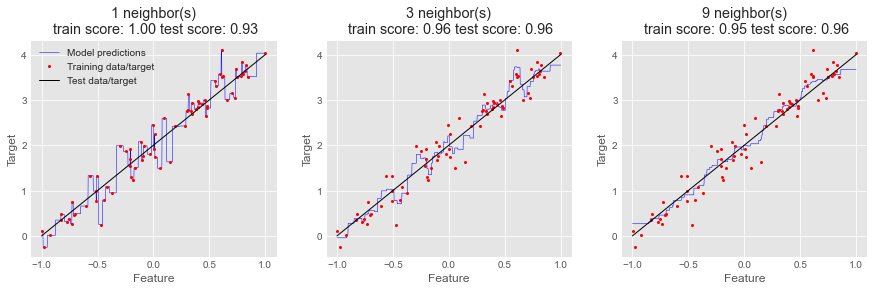

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-1, 1, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line), c='b', lw=0.5)     # KNN
    ax.plot(X_train, y_train, 'o', c='r', markersize=2) # data
    ax.plot(line, 2 + 2*line, c='k', lw=1)        # true relation
    # ax.plot(X_train, linreg.predict(X_train), c='k', lw=1, alpha=0.5) 
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(X_train, y_train), reg.score(X_test, y_test))) 
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

### 3.6 LAB

In [38]:
csv_file = os.path.join(UP_DIR,'Boston.csv')
Boston = pd.read_csv(csv_file) #, usecols=[1,2,3,4])
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [39]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Simple Linear Regression

In [41]:
# Fit a simple OLS
# Use: statsmodels

lm_fit = smf.ols('medv ~ lstat', Boston).fit()
print(lm_fit.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874


**Display 95% CI for the regrerssion coefficients directly**

In [10]:
# lm_fit.conf_int?


In [44]:
alpha = 0.01
CI = lm_fit.conf_int(alpha = alpha)
CI.columns = ['{}%'.format(100*alpha/2), '{}%'.format(100*(1-alpha/2))]
CI

,0.5%,99.5%
Intercept,33.099101,36.008581
lstat,-1.050199,-0.849899


**Predictions**

In [12]:
pred = lm_fit.predict(pd.DataFrame([5,10,15], columns=['lstat']))
print(pred)

0    29.803594
1    25.053347
2    20.303101
dtype: float64


**Now, compute Confidence Intervals (CI) for the predictions**

In [13]:
# Load the stats module from scipy - it contains necessery distribiutions
from scipy import stats

The formula for 'confidence/prediction' (also called 'mean/new') CI is (see for example "Linear Models in R" by J. Faraway, pp. 41-44):

(a) 'prediction' or 'new' 
$${\bf\mbox{prediction: }} y_* = x_*^{T}\hat{\beta} + \varepsilon$$

$${\bf\mbox{CI: }} y_*\pm t_{n-p}^{(\alpha/2)}\hat{\sigma}\sqrt{1+x_*^{T}(X^TX)^{-1}x_*}$$

(b) 'confidence' or 'mean'
$${\bf\mbox{prediction }}\mbox{(The mean): } \mu_* = x_*^{T}\hat{\beta}$$

$${\bf\mbox{CI: }} y_*\pm t_{n-p}^{(\alpha/2)}\hat{\sigma}\sqrt{x_*^{T}(X^TX)^{-1}x_*}$$



In [45]:
# https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.mse_resid.html?highlight=mse_resid
# mse_resid : Mean squared error of the residuals = 
# The sum of squared residuals divided by the residual degrees of freedom.

In the case of simple regression the two CI types are computed by the follwing finctions


In [46]:
def predict_intervals(model, X, y, X_star, level = 0.95, interval = "confidence"):
    """
    X:        array-like with shape (num_samples, num_features)
    y:        array-like with shape (num_samples, num_targets)
    X_star:   array-like with shape (num_predictions, num_features) with x-values for which we want predictions
    level:    CI level, a float in (0,1). Default value = 0.95
    interval: "confidence" or "prediction" for the type of CI
    Returns a dataframe with the endpoints of the confidence interval for each parameter
    """
    # Store parameters and corresponding stats for easy access
    s = model.summary()
    var = s.tables[1].data[-1:][0][0]
    predictions = model.predict(pd.DataFrame(X_star, columns=[var])) #
    RSE = np.sqrt(model.mse_resid)
    intervals = pd.DataFrame()
    
    # Degrees of freedom = num_samples - (num_features + 1)
    df = X.shape[0] - (X.shape[1] + 1)
    a, b = str(round((1 - level)*100/2, 2)) + "%", str(round((1 + level)*100/2, 2)) + "%"
    x_bar = X.mean()
    x_tss = np.sum((X - x_bar)**2)
    
    # Loop through each x-value being used for prediction
    for i in range(len(predictions)) :
        prediction = predictions[i]
        x_star = X_star[i]
        conf_error = RSE * (1/X.shape[0] + (x_star - x_bar)**2/x_tss)**0.5
        predict_error = (RSE**2 + conf_error**2)**0.5

        # loc = center of t-interval = predicted value from linear regression model
        # scale = standard error in predicted value estimate
        if (interval == "confidence"):
            lower, upper = stats.t.interval(level, df, loc = prediction, scale = conf_error)
            intervals = intervals.append(pd.Series({"prediction": prediction, a: lower, b: upper}), ignore_index = True)
        elif (interval == "prediction"):
            lower, upper = stats.t.interval(level, df, loc = prediction, scale = predict_error)
            intervals = intervals.append(pd.Series({"prediction": prediction, a: lower, b: upper}), ignore_index = True)
    return intervals.applymap(lambda x: np.round(x,2))

Now, let's compute the two CI types for 3 values of $x$

In [47]:
new2 =  [5,10,15]
X = Boston[['lstat']]
y = Boston['medv']

predict_intervals(lm_fit, X, y, new2, level = 0.95, interval = "confidence")

,2.5%,97.5%,prediction
0,[29.01],[30.6],29.80
1,[24.47],[25.63],25.05
2,[19.73],[20.87],20.30


In [33]:
predict_intervals(lm_fit, X, y, new2, level = 0.95, interval = "prediction") # CI are wider because of the extra variance 

,2.5%,97.5%,prediction
0,[17.57],[42.04],29.80
1,[12.83],[37.28],25.05
2,[8.08],[32.53],20.30


In [34]:
predict_intervals(lm_fit, X, y, new2, level = 0.99, interval = "prediction") # CI are wider because of the extra variance 

,0.5%,99.5%,prediction
0,[13.7],[45.91],29.80
1,[8.96],[41.14],25.05
2,[4.21],[36.39],20.30


Now, plot ${\tt medv}$ and ${\tt lstat}$ along with the least squares regression line using the ${\tt regplot()}$ function. We can define the color of the fit line using ${\tt line\_kws}$ ("line keywords"):

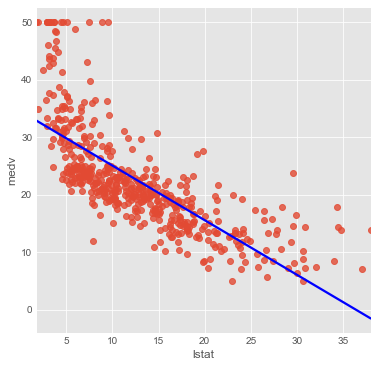

In [18]:
plt.style.use('ggplot')

plt.figure(figsize=(6,6))
sns.regplot('lstat', 'medv', Boston, line_kws = {"color":"b"}, ci=None)

We can also plot the residuals or the normalized residuals against the fitted values. Note that only the y-axis scales are different:

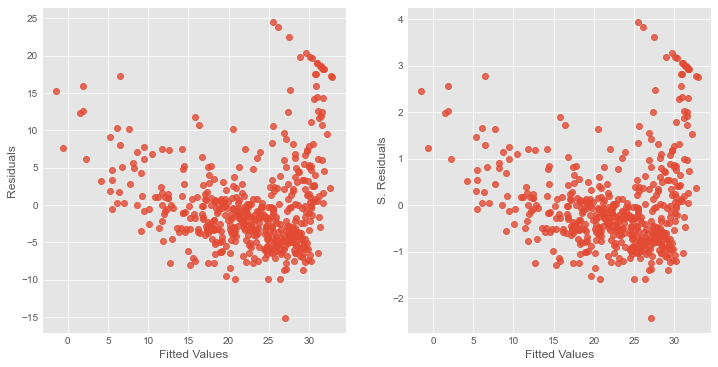

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

fitted_values = pd.Series(lm_fit.fittedvalues, name="Fitted Values")
residuals = pd.Series(lm_fit.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False, ax=axes[0])
#ax1.set_title('Residual Plot for Linear Fit')

s_residuals = pd.Series(lm_fit.resid_pearson, name="S. Residuals")
sns.regplot(fitted_values, s_residuals, fit_reg=False, ax=axes[1])


Or we can try identifying points with high leverage:

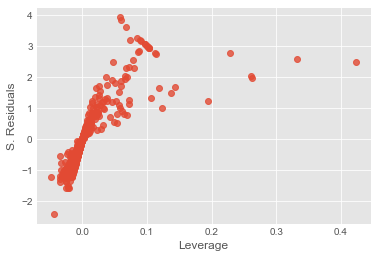

In [25]:
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = pd.Series(OLSInfluence(lm_fit).influence, name = "Leverage")
sns.regplot(leverage, s_residuals,  fit_reg=False)

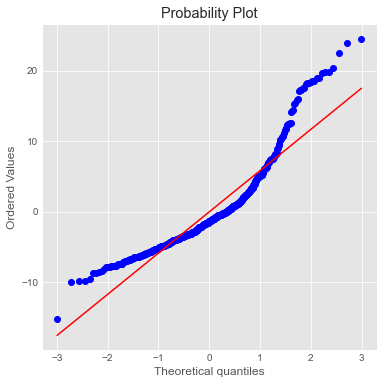

In [37]:
# A q-q plot

from scipy.stats import probplot

plt.figure(figsize=(6,6))
_ = probplot(lm_fit.resid, plot=plt)

### Multiple Linear Regression

The Boston data set contains 13 variables, and so it would be cumbersome to have to type all of these in order to perform a regression using all of the predictors. Instead, we can use the following short-hand:

In [51]:
'medv ~ ' + '+'.join(Boston.columns.difference(['medv', 'age', 'indus']))

'medv ~ black+chas+crim+dis+lstat+nox+ptratio+rad+rm+tax+zn'

In [52]:
model = smf.ols('medv ~ ' + '+'.join(Boston.columns.difference(['medv', 'age', 'indus'])), Boston)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 16 Sep 2020   Prob (F-statistic):          5.54e-137
Time:                        18:09:58   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.0

In [26]:
np.sqrt(3)

1.7320508075688772

Interaction Terms

Non-linear Transformations of the Predictors

Qualitative Predictors